# Data z webu EMIS

Zdroje znečišťování za rok 2017.
Údaje o provozovnách a emisích ohlášených v souhrnné provozní evidenci

## Zařízení spalující paliva z biomasy s příkonem nejméně 20 MW

Kritéria udržitelnosti musí splňovat zařízení spalující paliva z biomasy pro výrobu elektřiny, vytápění (a chlazení), jejichž celkový jmenovitý tepelný příkon je nejméně 20 MW v případě pevných paliv resp. nejméně 2 MW v případě plynných paliv. 

Výběr zařízení, která mají údaj o palivu a příslušný příkon (20 MW resp. 2 MW a více) a spadají do kategorie pevná biomasa nebo bioplyn. 

Údaje nejsou přesné, protože provozovna na webu EMIS nutně neznamená jeden zdroj, jak bychom si intuitivně přáli (jednu bioplynku, jednu výtopnu) apod. Viz příklad [Energetiky Kněžice](http://portal.chmi.cz/files/portal/docs/uoco/web_generator/plants/CZ020/211902152_CZ.html "Energetika Kněžice"), kde je v jednom zdroju spojená výtopna (s dvěma kotly) a bioplynová stanice, viz [licence](http://licence.eru.cz/detail.php?lic-id=310605027&sequence=1,2&total=2) na webu ERÚ. Jde spíše o jeden areál.

In [1]:
import pandas as pd
em = pd.read_csv('emis_data.csv', decimal=',', low_memory=False)

In [2]:
em = em.iloc[:, :9] # columns with emissions not needed
em

,url,nazev,nace,ulice_cp,psc_obec,souradnice,adm,prikon,paliva
0,http://portal.chmi.cz/files/portal/docs/uoco/w...,AAA AUTO International Praha - lakovna,451100,Dopraváků 723/1,184 00 Praha,"50° 8´ 13.890"" sš 14° 26´ 53.171"" vd",22341609.0,0.7,zemní plyn (průměrná výhř. 34050 kJ/m3)
1,http://portal.chmi.cz/files/portal/docs/uoco/w...,ABB s.r.o. - Polovodiče,271200,Novodvorská 1768/138a,142 21 Praha,"50° 1´ 40.854"" sš 14° 25´ 55.702"" vd",25206257.0,3.8,"nafta, zemní plyn (průměrná výhř. 34050 kJ/m3)"
2,http://portal.chmi.cz/files/portal/docs/uoco/w...,"AF BKK, s.r.o.",181200,Podkovářská 674/2,190 00 Praha,"50° 6´ 13.123"" sš 14° 30´ 50.482"" vd",22545883.0,NaN,NaN
3,http://portal.chmi.cz/files/portal/docs/uoco/w...,"AGAGA, s.r.o. - hotel Boscolo",551010,Senovážné náměstí 991/13,110 00 Praha,"50° 5´ 10.515"" sš 14° 26´ 1.861"" vd",21708053.0,2.2,"nafta, zemní plyn (průměrná výhř. 34050 kJ/m3)"
4,http://portal.chmi.cz/files/portal/docs/uoco/w...,"AGMA, a.s. - slévárna neželezných kovů",245400,Kolbenova 159/5,190 00 Praha,"50° 6´ 39.037"" sš 14° 30´ 28.623"" vd",22541918.0,1.4,zemní plyn (průměrná výhř. 34050 kJ/m3)
...,...,...,...,...,...,...,...,...,...
10058,http://portal.chmi.cz/files/portal/docs/uoco/w...,Zlínské cihelny s.r.o. - Závod Malenovice,233200,Šrámkova 1211,763 02 Zlín,"49° 12´ 38.386"" sš 17° 36´ 38.845"" vd",26213192.0,NaN,NaN
10059,http://portal.chmi.cz/files/portal/docs/uoco/w...,ZPS - FRÉZOVACÍ NÁSTROJE a.s.,257300,třída Tomáše Bati 5334,760 01 Zlín,"49° 13´ 18.157"" sš 17° 39´ 4.771"" vd",26263572.0,NaN,NaN
10060,http://portal.chmi.cz/files/portal/docs/uoco/w...,"ZPS - GENERÁLNÍ OPRAVY, a.s. - provozovna",331200,Dlouhé díly 335,763 02 Zlín,"49° 12´ 39.238"" sš 17° 36´ 57.549"" vd",25026208.0,1.1,zemní plyn (průměrná výhř. 34050 kJ/m3)
10061,http://portal.chmi.cz/files/portal/docs/uoco/w...,"ZPS - MECHANIKA, a.s.",255000,třída 3. května 1180,763 02 Zlín,"49° 12´ 22.882"" sš 17° 34´ 21.186"" vd",26205009.0,0.5,zemní plyn (průměrná výhř. 34050 kJ/m3)


### Přehled paliv

#### Všechna paliva


In [3]:
paliva = set()
for cell in em.paliva.dropna().values:
    for palivo in cell.split(', '):
        if palivo not in paliva:
            paliva.add(palivo)

paliva.discard('apod.')
paliva.discard('apod.)')
paliva

{'biomasa odpadní',
 'bioplyn',
 'butan a jejich směsi',
 'bylinná biomasa (sláma',
 'degazační plyn',
 'dřevní biomasa',
 'dřevotříska',
 'dřevovláknitá deska nebo jiné lepené dřevo',
 'generátorový plyn',
 'hnědé uhlí prachové',
 'hnědé uhlí tříděné',
 'jiné kapalné palivo',
 'jiné pevné palivo',
 'jiné plynné palivo',
 'jiné plyny z ocelářského průmyslu (např. konvertorový plyn)',
 'jiný druh biomasy',
 'kalový plyn',
 'kapalná biopaliva',
 'koks',
 'koksárenský plyn',
 'nafta',
 'odpad',
 'plynové oleje pro topení (obsah síry max. do 0,1 % vč.)',
 'propan',
 'proplástek',
 'pyrolýzní olej',
 'překližka',
 'skládkový plyn',
 'směsi uhlí',
 'topné oleje nízkosirné (obsah síry více než 0,1% a max. do 1 % vč.)',
 'topné oleje vysokosirné (obsah síry více než 1 %)',
 'vodík',
 'vysokopecní plyn',
 'výlisky z biomasy',
 'výlisky z uhlí',
 'vč. produktů zplyňování rafinérských zbytků',
 'zemní plyn (průměrná výhř. 34050 kJ/m3)',
 'zkapalněný zemní plyn',
 'černé uhlí prachové',
 'černé uh

In [4]:
len(paliva)

40

#### Paliva z biomasy


In [5]:
import re
biopaliva = set()
p = re.compile(r'(bio)+|(dřev)+')
for palivo in paliva:
    m = p.search(palivo)
    if m:
        biopaliva.add(palivo)
biopaliva

{'biomasa odpadní',
 'bioplyn',
 'bylinná biomasa (sláma',
 'dřevní biomasa',
 'dřevotříska',
 'dřevovláknitá deska nebo jiné lepené dřevo',
 'jiný druh biomasy',
 'kapalná biopaliva',
 'výlisky z biomasy'}

### Bioplynové stanice nad 2 MW příkonu

#### Bioplyn v kombinaci s jiným palivem

Zahrnuje bioplyn i v kombinaci s jiným palivem (viz nejasná definice provozovny).


In [6]:
bioplyn = em[(em.paliva.str.contains('bioplyn', na=False)) & (em.prikon >= 2)]
# bioplyn.to_csv('bps_2+.csv', decimal=',')
print(f'Celkem {bioplyn.shape[0]} bioplynek (vč. ostatních paliv)')

Celkem 168 bioplynek (vč. ostatních paliv)


In [7]:
bioplyn.prikon.describe()

count    168.000000
mean       4.903571
std       11.524542
min        2.000000
25%        2.475000
50%        2.800000
75%        3.900000
max      141.000000
Name: prikon, dtype: float64

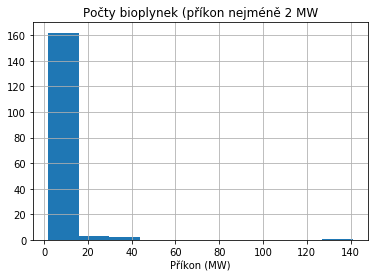

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Počty bioplynek (příkon nejméně 2 MW')
plt.xlabel('Příkon (MW)')
bioplyn.prikon.hist()

#### Pouze bioplyn


In [9]:
bioplyn_cisty = em[(em.paliva.isin(['bioplyn'])) & (em.prikon >= 2)]
# bioplyn.to_csv('bps_2+_cisty.csv', decimal=',')
print(f'Celkem {len(bioplyn_cisty)} BPS bez jiného paliva.')

Celkem 113 BPS bez jiného paliva.


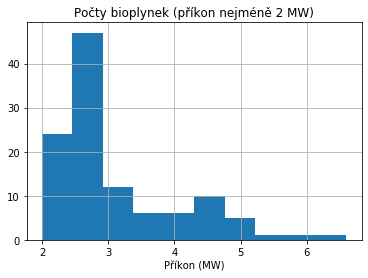

In [10]:
plt.figure()
plt.title('Počty bioplynek (příkon nejméně 2 MW)')
plt.xlabel('Příkon (MW)')
bioplyn_cisty.prikon.hist()

### Biomasa s nejméně 20 MW příkonu

#### Biomasa v kombinaci s jiným palivem

Zahrnuje čistou biomasu i spoluspalování i část různých zdrojů v jednom areálu (nejednoznačná definice provozovny).

In [11]:
biomasa = em[ (em.prikon >= 20) & ((em.paliva.str.contains('dřevo', na=False)) | (em.paliva.str.contains('bio', na=False)))]
# biomasa.to_csv('biomasa_20+.csv', decimal=',')
print(f'Celkem {len(biomasa)} zařízení (vč. ostatních paliv)')

Celkem 48 zařízení (vč. ostatních paliv)


In [12]:
biomasa.prikon.describe()

count     48.000000
mean     147.064583
std      170.437453
min       20.000000
25%       31.325000
50%       51.350000
75%      227.375000
max      645.900000
Name: prikon, dtype: float64

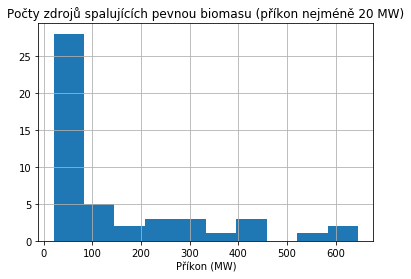

In [13]:
plt.figure()
plt.title('Počty zdrojů spalujících pevnou biomasu (příkon nejméně 20 MW)')
plt.xlabel('Příkon (MW)')
biomasa.prikon.hist()

#### Pouze čistá biomasa


In [14]:
biomasa_cista = em[(em.prikon >= 20) & (em.paliva.str.contains('bio|dřev', regex=True, na=False) == True) & (em.paliva.str.contains('uhlí|zemní|olej|nafta', regex=True, na=False) == False ) ]
print(f'Celkem {biomasa_cista.shape[0]} zařízení (čistá biomasa)')
biomasa_cista[['nazev','prikon', 'paliva']]

Celkem 6 zařízení (čistá biomasa)


,nazev,prikon,paliva
1403,"Teplárna Loučovice, a.s.",46.5,dřevní biomasa
3994,Mayr-Melnhof Holz Paskov s.r.o.,24.0,dřevní biomasa
6725,"Stora Enso Wood Products Planá, s.r.o.",20.9,dřevní biomasa
7078,"BIOENERGO - KOMPLEX, s.r.o., Kolín",25.8,"bylinná biomasa (sláma, apod.)"
7204,EC Kutná Hora s.r.o.,46.6,"bylinná biomasa (sláma, apod.), výlisky z biomasy"
7233,LESS & ENERGY s.r.o. - Čáslav,20.2,dřevní biomasa


In [15]:
biomasa_cista.prikon.describe()

count     6.000000
mean     30.666667
std      12.471033
min      20.200000
25%      21.675000
50%      24.900000
75%      41.325000
max      46.600000
Name: prikon, dtype: float64

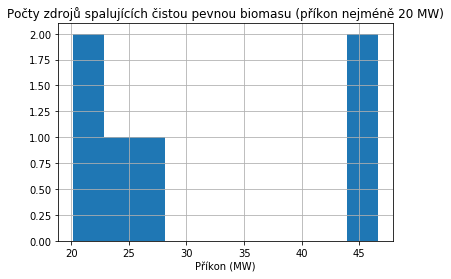

In [16]:
plt.figure()
plt.title('Počty zdrojů spalujících čistou pevnou biomasu (příkon nejméně 20 MW)')
plt.xlabel('Příkon (MW)')
biomasa_cista.prikon.hist()